In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import scheme_mar2023 as scheme

In [153]:
plt.style.use('default')   # try another styles: 'classic', Solarize_Light2

In [154]:
df18 = pd.read_csv('G:/1_Data1/sea/BaikalJun2018Sea.dat',
                 sep='\t',
                 decimal=',',
                 na_values='--',
                 skiprows=[0,2],
                 #nrows=1000,
                 parse_dates=['DateTime'],
                 dayfirst=True,
                )
df18.columns = scheme.convert_names(df18.columns)

In [155]:
df21 = pd.read_csv('G:/1_Data1/sea/BaikalJun2021Sea.dat',
                    sep='\t',
                    decimal=',',
                    na_values='--',
                    skiprows=[0,2,3],
                    #nrows=1000,
                    parse_dates=['DateTime'],
                    dayfirst=True,
                  )
df21.columns = scheme.convert_names(df21.columns)

In [156]:
df22 = pd.read_csv('G:/1_Data1/sea/BaikalJun2022Sea.dat',
                    sep='\t',
                    decimal=',',
                    na_values='--',
                    skiprows=[0,2,3],
                    #nrows=1000,
                    parse_dates=['DateTime'],
                    dayfirst=True,
                  )
df22.columns = scheme.convert_names(df22.columns)

In [157]:
df23 = pd.read_csv('G:/1_Data1/sea/BaikalJun2023Sea.dat',
                    sep='\t',
                    decimal=',',
                    na_values='--',
                    skiprows=[0,2,3],
                    #nrows=1000,
                    parse_dates=['DateTime'],
                    dayfirst=True,
                  )
df23.columns = scheme.convert_names(df23.columns)

In [158]:
df24 = pd.read_csv('G:/1_Data1/sea/BaikalJun2024Sea.dat',
                    sep='\t',
                    decimal='.',
                    na_values='--',
                    skiprows=[1,2,3],
                    #nrows=1000,
                    parse_dates=['DateTime'],
                    dayfirst=False,  # carefully about date format
                  )
df24.columns = scheme.convert_names(df24.columns)

In [159]:
df = pd.concat([df18, df21, df22, df23, df24], ignore_index=True, axis='index')
df

,DateTime,Time,Longitude,Latitude,Twtr,pCO2wtr,cCO2wtr,pCH4wtr,cCH4wtr,pCO2air,...,TempEqu4,CH4_dry_class,CO2_dry_class,Chn_valid,vCO2air_a,dTSec,DateTime.1,hour,DateSec,WaterFlow4
0,2018-05-25 22:15:01,0.927095,NaN,NaN,2.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-25 22:15:20,0.927315,NaN,NaN,2.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-25 22:15:39,0.927535,NaN,NaN,2.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-25 22:15:58,0.927755,NaN,NaN,2.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-25 22:16:17,0.927975,NaN,NaN,2.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307826,2024-06-12 19:16:20,NaN,105.044195,51.878914,NaN,NaN,NaN,NaN,NaN,398.430013,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 19:16:20,19.0,1.718220e+09,NaN
307827,2024-06-12 19:16:40,NaN,105.043188,51.878469,NaN,NaN,NaN,NaN,NaN,398.481455,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 19:16:40,19.0,1.718220e+09,NaN
307828,2024-06-12 19:17:00,NaN,105.042178,51.878013,NaN,NaN,NaN,NaN,NaN,398.339389,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 19:17:00,19.0,1.718220e+09,NaN
307829,2024-06-12 19:17:20,NaN,105.041126,51.877511,NaN,NaN,NaN,NaN,NaN,398.161076,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12 19:17:20,19.0,1.718220e+09,NaN


In [160]:
cols = df.columns
import collections
[item for item, count in collections.Counter(cols).items() if count > 1]

[]

In [161]:
cols_we_need = ['DateTime', 'Longitude', 'Latitude',
                'pCO2wtr', 'cCO2wtr', 'pCH4wtr', 'cCH4wtr', 'pCO2air', 'pCH4air',
                'dpCO2', 'dpCH4',
                'vCO2air', 'vCH4air', 
                'ChnN', 'Channel',
                'PressAir',
                'Piro', 'PiroUV', 'LightLX', 'LightUV', 'PiroVisio',
                'Wnd', 'WindSpeed', 
                'TempAir',
                'Precipi', 'Precipitation',
                'AirFlow',
                'TempEqu1', 'TempEqu2', 'TempEqu3', 'Twtr',
                'WaterFlow1', 'WaterFlow2', 'WaterFlow3',
               ]
df = df.loc[:, cols_we_need]

In [162]:
df.dropna(subset=['DateTime', 'Longitude', 'Latitude'], axis='index', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,DateTime,Longitude,Latitude,pCO2wtr,cCO2wtr,pCH4wtr,cCH4wtr,pCO2air,pCH4air,dpCO2,...,Precipi,Precipitation,AirFlow,TempEqu1,TempEqu2,TempEqu3,Twtr,WaterFlow1,WaterFlow2,WaterFlow3
0,2018-05-25 22:58:56,104.650516,51.773753,366.505060,1.125353,5.183085,0.193423,NaN,NaN,NaN,...,0.0,NaN,0.40000,NaN,NaN,NaN,2.25,9.028938,NaN,NaN
1,2018-05-25 22:59:15,104.649358,51.773537,366.191639,1.124390,5.149101,0.192155,NaN,NaN,NaN,...,0.0,NaN,0.40000,NaN,NaN,NaN,2.25,9.028938,NaN,NaN
2,2018-05-25 22:59:34,104.648222,51.773322,366.185459,1.124371,5.182093,0.193386,NaN,NaN,NaN,...,0.0,NaN,0.40000,NaN,NaN,NaN,2.25,9.022004,NaN,NaN
3,2018-05-25 22:59:53,104.647037,51.773058,365.834769,1.123295,5.168995,0.192897,NaN,NaN,NaN,...,0.0,NaN,0.40000,NaN,NaN,NaN,2.25,9.015069,NaN,NaN
4,2018-05-25 23:00:13,104.645883,51.772739,365.422268,1.122028,5.201343,0.194104,NaN,NaN,NaN,...,0.0,NaN,0.40000,NaN,NaN,NaN,2.25,9.001200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289233,2024-06-12 19:16:20,105.044195,51.878914,NaN,NaN,NaN,NaN,398.430013,1.896581,NaN,...,NaN,3.56,1.02497,8.44,7.93,10.81,NaN,0.000000,0.0,0.0
289234,2024-06-12 19:16:40,105.043188,51.878469,NaN,NaN,NaN,NaN,398.481455,1.896495,NaN,...,NaN,3.57,1.02497,8.45,7.95,10.81,NaN,0.000000,0.0,0.0
289235,2024-06-12 19:17:00,105.042178,51.878013,NaN,NaN,NaN,NaN,398.339389,1.896484,NaN,...,NaN,3.57,1.02497,8.47,7.98,10.81,NaN,0.000000,0.0,0.0
289236,2024-06-12 19:17:20,105.041126,51.877511,NaN,NaN,NaN,NaN,398.161076,1.896452,NaN,...,NaN,3.56,1.02497,8.51,7.99,10.87,NaN,0.000000,0.0,0.0


In [163]:
## DateTime 
df.sort_values(by='DateTime', inplace=True)
df['year'] = df['DateTime'].dt.year
df['DateTimeSec'] = df['DateTime'].astype('int64')/10**9
df['DateTimeSec'].astype('int32')
df['dt'] = df['DateTimeSec'] - df['DateTimeSec'].shift(1)

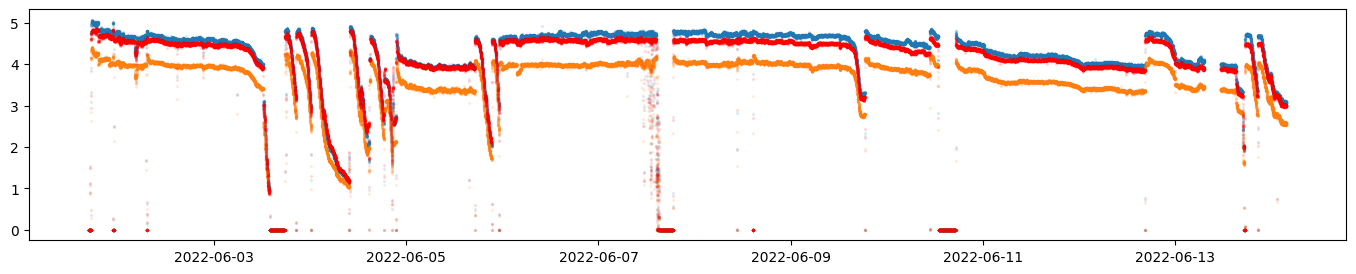

In [192]:
_df = df.loc[df['year']==2022, :]
plt.rcParams['figure.figsize'] = [17, 3]
plt.scatter('DateTime', 'WaterFlow2', data=_df, s=2, alpha=0.1)
plt.scatter('DateTime', 'WaterFlow3', data=_df, s=2, alpha=0.1)
plt.scatter('DateTime', 'WaterFlow1', data=_df, s=2, alpha=0.1, c='red')

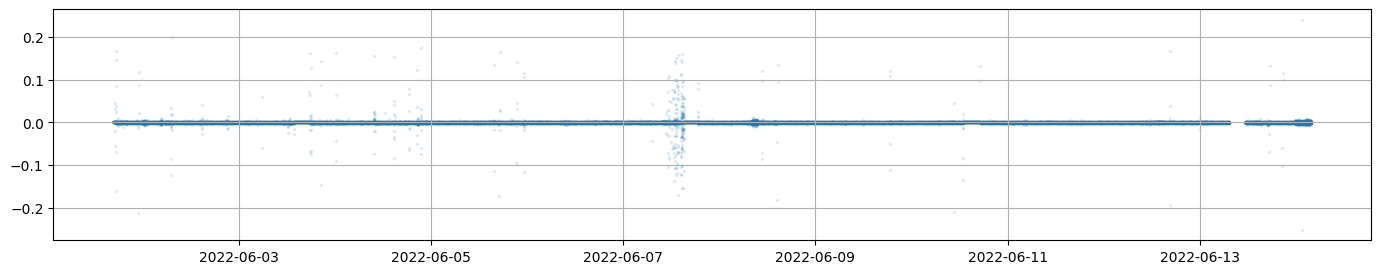

In [199]:
df['_WaterFlow'] = df['WaterFlow1'].rolling(20).mean()
df['dWaterFlow'] = (df['_WaterFlow'] - df['_WaterFlow'].shift(1))/df['dt']
plt.rcParams['figure.figsize'] = [17, 3]
plt.scatter('DateTime', 'dWaterFlow', data=_df, s=2, alpha=0.1)
#plt.ylim(-0.0020, 0.002)
plt.grid()